# High magnification optical depth

This notebook includes the basic calculations to compute the high magnification optical depth for a given lens population. The high magnification optical depth is defined as the probability of observing a high magnification event, i.e., a lensing event with a magnification $\mu > \mu_{\rm th}$, where $\mu_{\rm th}$ is a given threshold. The high magnification optical depth depends on the distribution of lenses and their properties. In the high magnification limit, the magnification distribution is however universal, with an scaling of $P(\mu) \propto \mu^{-3}$.

The optical depth is defined as
$$\frac{d^2\tau}{dz_Ld\log M}=\frac{1}{4\pi}\frac{dV_c}{dz}\frac{dn}{d\log M}\sigma(\mu>\mu_{\rm th})$$
where $\frac{dV_c}{dz}$ is the comoving volume element, $\frac{dn}{d\log M}$ is the mass function of the lenses, and $\sigma$ is the cross section for high magnification events. 
The cross section for high magnification events scales as $\sigma\propto \mu_{\rm th}^{-2}$.

To get the optical depth we then need:
1. The mass function of the lenses, $\frac{dn}{d\log M}$
2. The comoving volume element, $\frac{dV_c}{dz}$
3. The cross section for high magnification events, $\sigma(\mu>\mu_{\rm th})$ (although the scaling is universal, the normalization depends on the lens population)

References:

- Tinker et al.'08 https://arxiv.org/abs/0803.2706
- Robertson et al. 2020 https://academic.oup.com/mnras/article/495/4/3727/5843301

In [1]:
import numpy as np

from gw_lensing.utils.constants import *
from gw_lensing.lens_models import sis
from gw_lensing.optical_depth import sis_optical_depth as sistau

#PLOTTING MODULES
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSZ = 17
fontSz = 15
fontsz = 13
fontssz = 11

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

import sys
dir_base=sys.path[0]
dir_out=dir_base+"/plots_optical_depth/"

# Singular Isothermal Sphere (SIS)

The SIS is described by the velovity dispersion $\sigma$ of the lens that can be mapped to a given viralized mass of the halo (see Dodelson exercise 3.4).

The density is described by
\begin{equation}
\rho_{SIS}(r)=\frac{\sigma^2}{2\pi G r^2}\,,
\end{equation}
which diverges at $r\to 0$. 

We can define the halo as the region where the density is 200 times the critical density of the universe $\rho_c$, so that the mass enclosed in a spherical halo follows from its mean enclosed density at a volume of radius $r_{200}$:
\begin{equation}
\rho_{200}=200\rho_c=\frac{m_{200}}{4\pi r^{3}_{200}/3}.
\end{equation}
This can also be computed as the mass within a 3D radius
\begin{equation}
m_{200}=\int_{r<r_{200}}d^3r\rho_{SIS}(r)=\frac{2\sigma^2}{G}r_{200}\,,
\end{equation}
which also implies that the mass enclosed in the halo diverges at $r\to\infty$. 
From these expressions above one can see that
\begin{equation}
m_{200}=\frac{\sqrt{6}\sigma^3}{\sqrt{\pi G^{3}\rho_{200}}}\,.
\end{equation}
Inverting this relation we get
\begin{equation}
\sigma_v = \left(\frac{\sqrt{\pi G^3\rho_{200}}m_{200}}{\sqrt{6}}\right)^{1/3}\,.
\end{equation}
From here we can see that the Einstein radius
\begin{equation}
\theta_E = \frac{\sigma_v^2}{G\Sigma_{crit}D_L}=\frac{4\pi D_{SL}\sigma_v^2}{D_S c^2}\propto m_{200}^{2/3}
\end{equation}

Note that people also like to talk about the mass enclosed in a 2D radius and relate this to the surface density:
\begin{equation}
M(R)=2\pi\int dR\cdot R\Sigma(R)=\frac{\pi\sigma^2}{G}R
\end{equation}

We will use this connection between the mass and the velocity dispersion to compute the number density of lenses.

In [2]:
print('Velocity dispersion of M200=1e12 halo is =',sis.sigma_v(1e12,0)/1e3,' km/s')

Velocity dispersion of M200=1e12 halo is = 100.95100492508162  km/s


See also discussion in Sec. III [Çaliskan et al. 2023](https://arxiv.org/abs/2307.06990)

## High magnification cross section

The high magnification cross section can be computed analytically for the SIS lens, it is given by
\begin{equation}
\sigma(\mu>\mu_{\rm th})=\pi\theta^2_E\frac{2(\mu_{\rm th}^2+1)}{(\mu_{\rm th}^2 -1)^2}\,,
\end{equation}
where $\theta_E$ is the Einstein radius of the lens. 

The Einstein radius is
\begin{equation}
\theta_E = 4\pi \frac{\sigma^2D_{LS}}{c^2D_S}
\end{equation}

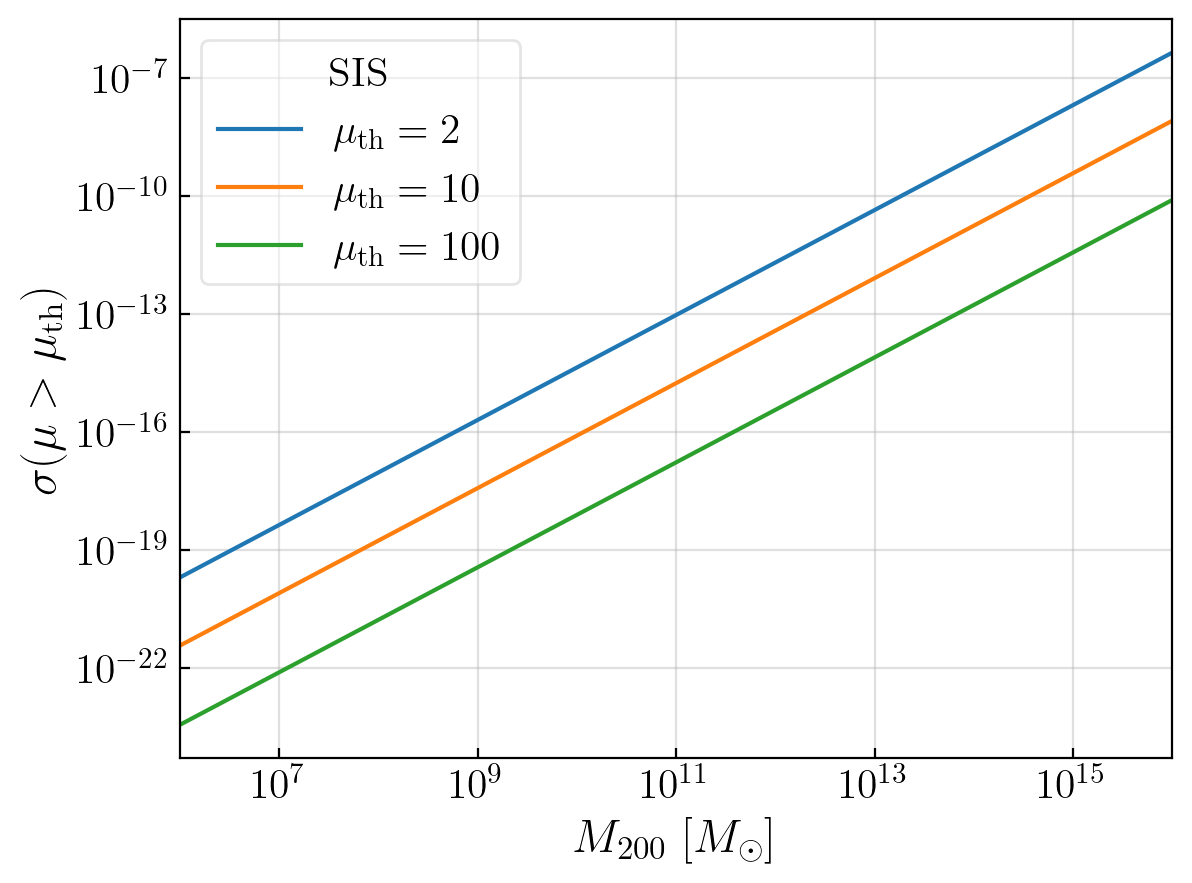

In [3]:
# Plot high magnification cross-section
Ms = np.logspace(6,16,100)

zS = 2.
zL = 1.

mu0s = np.array([2,10,100])

for mu0 in mu0s:
    plt.loglog(Ms,sis.sigma_mu(Ms,zL,zS,mu0),label=r'$\mu_{\rm th}=%s$' % mu0)

plt.xlabel(r'$M_{200}$ [$M_\odot$]',fontsize=fontSZ)
plt.ylabel(r'$\sigma(\mu>\mu_{\rm th})$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)


legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5, title='SIS')

plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(Ms),max(Ms)])
#plt.ylim([1e-10,1e3])
plt.show()

## Optical depth

_Note:_ in astrophy the differential comoving volume element is defined divided by the solid angle, so that the differential comoving volume output is
\begin{equation}
\frac{1}{4\pi}\frac{dV_c}{dz}
\end{equation}
See [documentation](https://docs.astropy.org/en/stable/api/astropy.cosmology.FlatLambdaCDM.html#astropy.cosmology.FlatLambdaCDM.differential_comoving_volume)


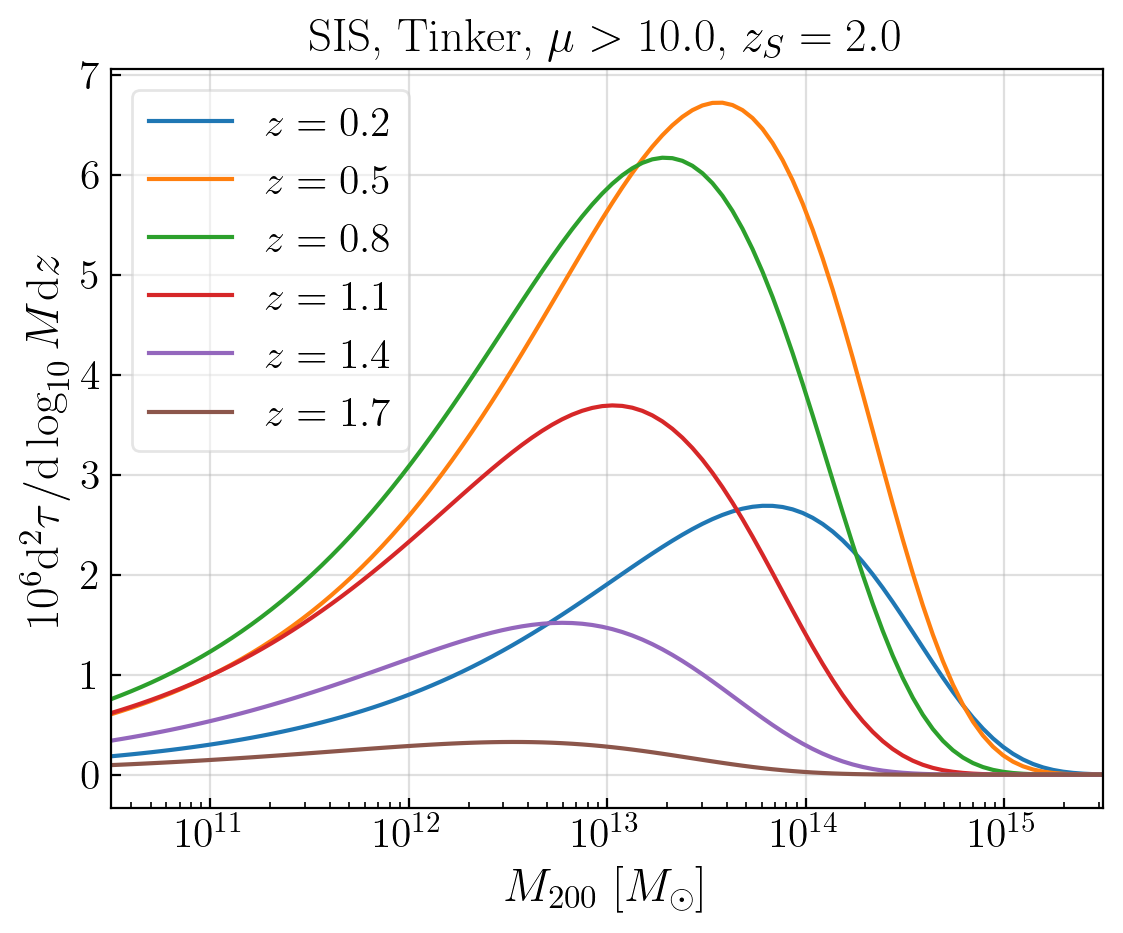

In [4]:
z_S = 2. #source redshift
mu0 = 10. #magnification threshold

Ms = np.logspace(10.5,15.5,100)
nzs = 6
zs = np.linspace(0.2,1.7,nzs)

for i in range(nzs):
    #we plot in log10M scale
    plt.semilogx(Ms,1e6*sistau.d2taudzdlnM_mu(Ms,zs[i],z_S,mu0)/np.log10(np.e),label=r'$z=%s$' % np.round(zs[i],1))

plt.xlabel(r'$M_{200}$ [$M_\odot$]',fontsize=fontSZ)
plt.ylabel(r'$10^6\mathrm{d}^2\tau/\mathrm{d}\log_{10} M\mathrm{d}z$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)

legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5)#,bbox_to_anchor=(0.5,1.02)
plt.title(r'SIS, Tinker, $\mu>%s$, $z_S=%s$' % (mu0,z_S),fontsize=fontSZ)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(Ms),max(Ms)])
#plt.savefig(dir_out+'ddtaudlnMdz_M.pdf', bbox_inches='tight', transparent=True)
plt.show()

Note that in Robertson et al. [https://arxiv.org/abs/2002.01479] Fig. 1 the compute the optical depth of $\mu>10$.

**NOTE** there seems to be a factor of 2 difference with their plot. Check later!

The differentila optical depth as a function of redshift for different mass ranges

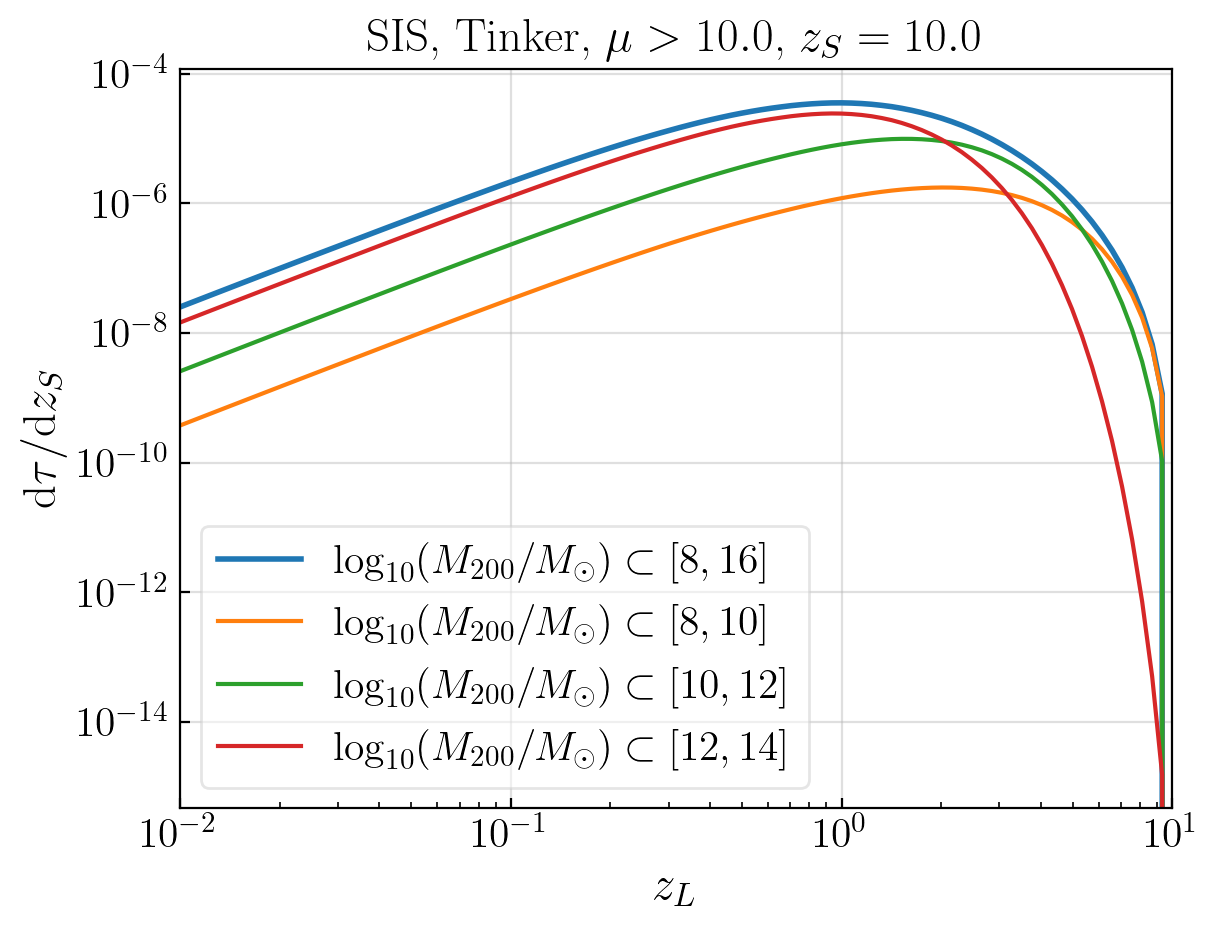

In [5]:
mu0 = 10. #magnification threshold
nzs = 100
z_Ls = np.logspace(-2,1,100)
z_S = max(z_Ls)

log10Mmin,log10Mmax, nMs = 8, 16, 1000
plt.loglog(z_Ls,sistau.dtaudz_mu(z_Ls,z_S,mu0,log10Mmin,log10Mmax,nMs),lw=2,label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 8, 10, 1000
plt.loglog(z_Ls,sistau.dtaudz_mu(z_Ls,z_S,mu0,log10Mmin,log10Mmax,nMs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 10, 12, 1000
plt.loglog(z_Ls,sistau.dtaudz_mu(z_Ls,z_S,mu0,log10Mmin,log10Mmax,nMs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 12, 14, 1000
plt.loglog(z_Ls,sistau.dtaudz_mu(z_Ls,z_S,mu0,log10Mmin,log10Mmax,nMs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))

plt.title(r'SIS, Tinker, $\mu>%s$, $z_S=%s$' % (mu0,z_S),fontsize=fontSZ)
plt.xlabel(r'$z_L$',fontsize=fontSZ)
plt.ylabel(r'$\mathrm{d}\tau/\mathrm{d}z_S$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(z_Ls),max(z_Ls)])
#plt.ylim(1e-10,1)
#plt.savefig(dir_out+'dtaudz_zL.pdf', bbox_inches='tight', transparent=True)
plt.show()

The total optical depth

tau at z= 100.0  is  0.00013004685026405397


/Users/jmezquiaga/opt/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/numpy/ma/core.py:6957: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


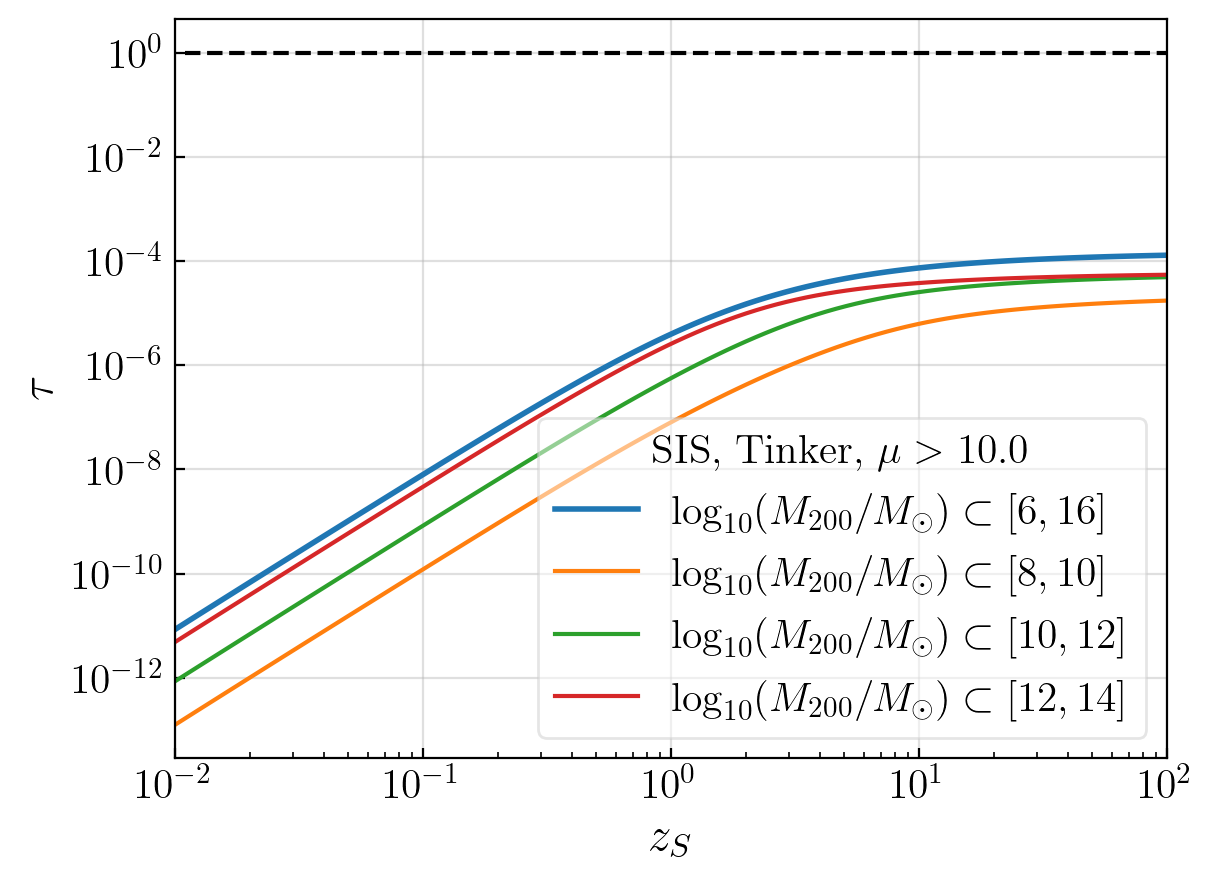

In [6]:
mu0 = 10. #magnification threshold
nzs = 100
z_Ss = np.logspace(-2,2,100)

log10Mmin,log10Mmax, nMs = 6, 16, 1000
tSIS_tot = sistau.tau_mu(z_Ss,mu0,log10Mmin,log10Mmax,nMs,nzs)
plt.loglog(z_Ss,tSIS_tot,lw=2,label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
print('tau at z=',z_Ss[-1],' is ',tSIS_tot[-1])
log10Mmin,log10Mmax, nMs = 8, 10, 1000
plt.loglog(z_Ss,sistau.tau_mu(z_Ss,mu0,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 10, 12, 1000
plt.loglog(z_Ss,sistau.tau_mu(z_Ss,mu0,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))
log10Mmin,log10Mmax, nMs = 12, 14, 1000
plt.loglog(z_Ss,sistau.tau_mu(z_Ss,mu0,log10Mmin,log10Mmax,nMs,nzs),label=r'$\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))

plt.axhline(1,min(z_Ss),max(z_Ss),ls='--',color='k')
plt.xlabel(r'$z_S$',fontsize=fontSZ)
plt.ylabel(r'$\tau$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title='SIS, Tinker, $\mu>%s$' % mu0)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([min(z_Ss),max(z_Ss)])
#plt.savefig(dir_out+'tau_zS.pdf', bbox_inches='tight', transparent=True)
plt.show()

tau at z= 5.000000000000001  is  0.002481656796884243  for mu0= 2
tau at z= 5.000000000000001  is  4.6032568684170524e-05  for mu0= 10
tau at z= 5.000000000000001  is  4.4683225524423386e-07  for mu0= 100


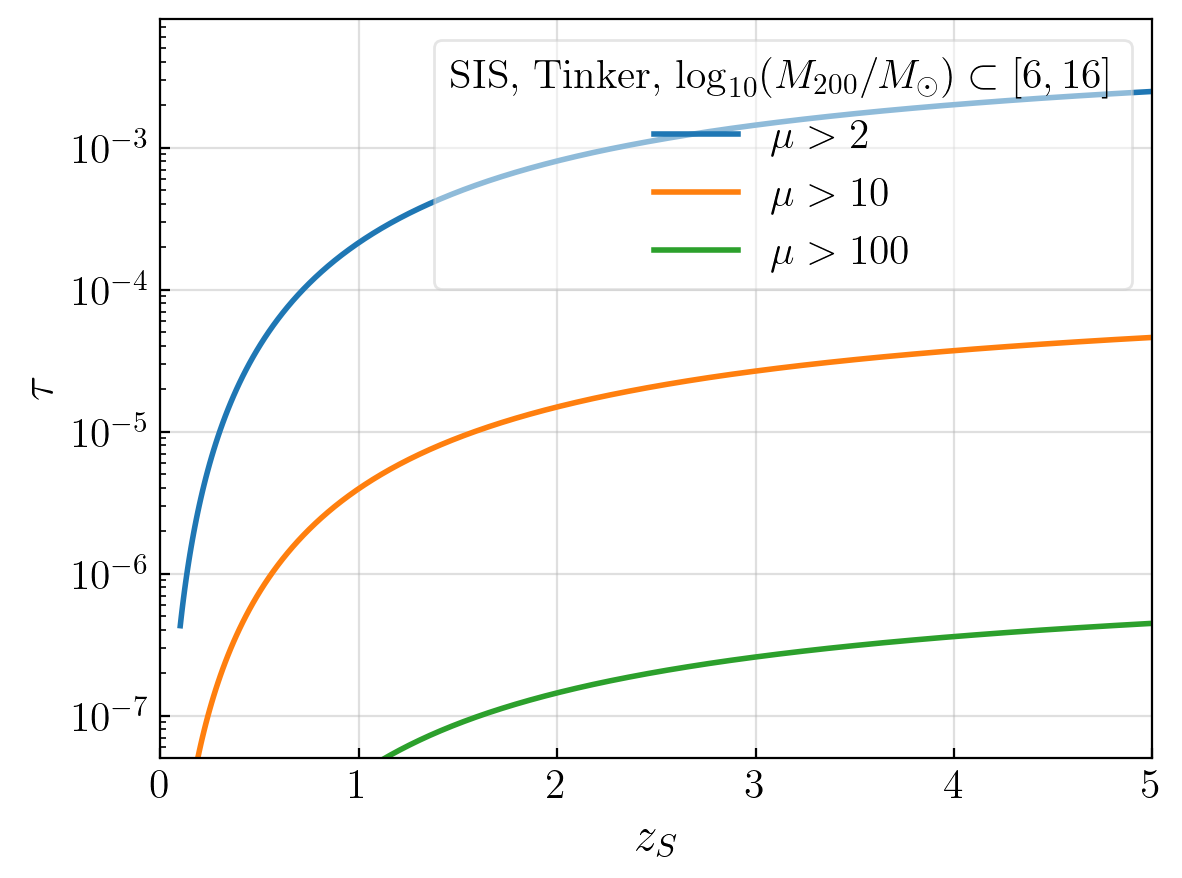

In [7]:
nzs = 100
z_Ss = np.logspace(-1,np.log10(5),100)

log10Mmin,log10Mmax, nMs = 6, 16, 1000

mu0s = [2,10,100]
for mu0 in mu0s:
    tSIS_tot = sistau.tau_mu(z_Ss,mu0,log10Mmin,log10Mmax,nMs,nzs)
    plt.plot(z_Ss,tSIS_tot,lw=2,label=r'$\mu>%s$' % mu0)
    print('tau at z=',z_Ss[-1],' is ',tSIS_tot[-1], ' for mu0=',mu0)

plt.yscale('log')

#plt.axhline(1,min(z_Ss),max(z_Ss),ls='--',color='k')
plt.xlabel(r'$z_S$',fontsize=fontSZ)
plt.ylabel(r'$\tau$',fontsize=fontSZ)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
legend = plt.legend(ncol=1,fontsize=fontSz, framealpha=0.5,title=r'SIS, Tinker, $\log_{10}(M_{200}/M_\odot)\subset [%s,%s]$' % (log10Mmin,log10Mmax))#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontSz)
plt.grid(alpha=0.4)
plt.xlim([0.,max(z_Ss)])
plt.ylim([5e-8,8e-3])
#plt.savefig(dir_out+'tau_zS.pdf', bbox_inches='tight', transparent=True)
plt.show()

This is to be compared with Robertson et al. [https://arxiv.org/abs/2002.01479] Fig. 5.